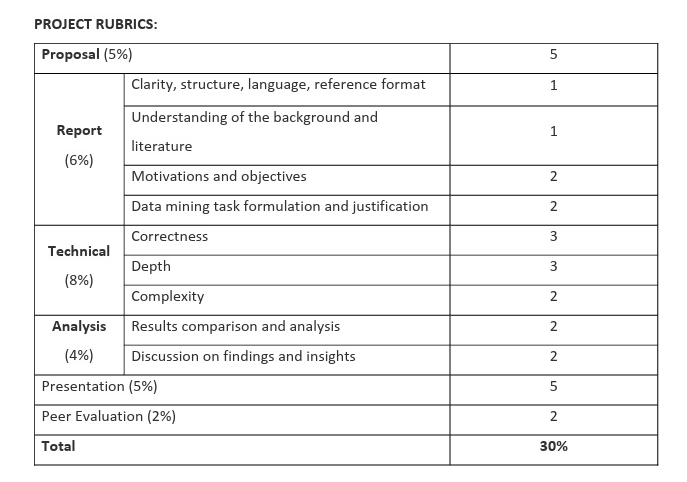

# Importing Package and Dataset

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# pretty plots!

sns.set_palette("viridis")
sns.set_style('darkgrid')
colours_list = ["viridis", "rocket", 'mako']

## Importing UCI Dataset Repository


[Mushroom](https://archive.ics.uci.edu/dataset/73/mushroom) dataset. UCI provides package to directly import the dataset in python without having to download the csv file.

The code can be taken from the link page where a button 'Import in Python' can be found. 'ucimlrepo' is a package to easily import datasets from the UC Irvine Machine Learning Repository into scripts and notebooks.

In [62]:
!pip install ucimlrepo

In [63]:
from ucimlrepo import fetch_ucirepo
# https://github.com/uci-ml-repo/ucimlrepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
display(mushroom.metadata)

# variable information
display(mushroom.variables)

{'uci_id': 73,
 'name': 'Mushroom',
 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom',
 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv',
 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 8124,
 'num_features': 22,
 'feature_types': ['Categorical'],
 'demographics': [],
 'target_col': ['poisonous'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1981,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5959T',
 'creators': [],
 'intro_paper': None,
 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely 

,name,role,type,demographic,description,units,missing_values
0,poisonous,Target,Categorical,None,None,None,no
1,cap-shape,Feature,Categorical,None,"bell=b,conical=c,convex=x,flat=f, knobbed=k,su...",None,no
2,cap-surface,Feature,Categorical,None,"fibrous=f,grooves=g,scaly=y,smooth=s",None,no
3,cap-color,Feature,Binary,None,"brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...",None,no
4,bruises,Feature,Categorical,None,"bruises=t,no=f",None,no
5,odor,Feature,Categorical,None,"almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...",None,no
6,gill-attachment,Feature,Categorical,None,"attached=a,descending=d,free=f,notched=n",None,no
7,gill-spacing,Feature,Categorical,None,"close=c,crowded=w,distant=d",None,no
8,gill-size,Feature,Categorical,None,"broad=b,narrow=n",None,no
9,gill-color,Feature,Categorical,None,"black=k,brown=n,buff=b,chocolate=h,gray=g, gre...",None,no


In [64]:
print(X.dtypes)
print(X.shape)
print('---------------------------------')
print(y.dtypes)
print(y.shape)

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object
(8124, 22)
---------------------------------
poisonous    object
dtype: object
(8124, 1)


In [65]:
raw = pd.concat([X, y], axis=1)
display(raw.shape)
raw.head()

(8124, 23)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


# Mapping

In [66]:
# poisonous doesn't have a description, adding own
raw['poisonous'].unique()

array(['p', 'e'], dtype=object)

In [67]:
# extract codebook to mapping dict
mushroom_map = {'poisonous': {'p':'poisonous', 'e':'edible'}}
mushroom_vars = pd.DataFrame(mushroom.variables)

# display(mushroom.variables)

for index, row in mushroom_vars.iloc[1:].iterrows():
  # split the description items
  var = str(row['name'])
  desc = str(row['description'])
  desc_items = desc.split(',')

  if var not in mushroom_map:
    mushroom_map[var] = {}

  # add dictionary of descriptions
  for item in desc_items:
    value, key = item.split('=')
    mushroom_map[var][key.strip()] = value.strip()

mushroom_map

{'poisonous': {'p': 'poisonous', 'e': 'edible'},
 'cap-shape': {'b': 'bell',
  'c': 'conical',
  'x': 'convex',
  'f': 'flat',
  'k': 'knobbed',
  's': 'sunken'},
 'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
 'cap-color': {'n': 'brown',
  'b': 'buff',
  'c': 'cinnamon',
  'g': 'gray',
  'r': 'green',
  'p': 'pink',
  'u': 'purple',
  'e': 'red',
  'w': 'white',
  'y': 'yellow'},
 'bruises': {'t': 'bruises', 'f': 'no'},
 'odor': {'a': 'almond',
  'l': 'anise',
  'c': 'creosote',
  'y': 'fishy',
  'f': 'foul',
  'm': 'musty',
  'n': 'none',
  'p': 'pungent',
  's': 'spicy'},
 'gill-attachment': {'a': 'attached',
  'd': 'descending',
  'f': 'free',
  'n': 'notched'},
 'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
 'gill-size': {'b': 'broad', 'n': 'narrow'},
 'gill-color': {'k': 'black',
  'n': 'brown',
  'b': 'buff',
  'h': 'chocolate',
  'g': 'gray',
  'r': 'green',
  'o': 'orange',
  'p': 'pink',
  'u': 'purple',
  'e': 'red',
  'w': '

In [68]:
df_rename = raw.copy()

for col, mapping in mushroom_map.items():
    if col in df_rename.columns:
        df_rename[col] = df_rename[col].apply(lambda x: mapping.get(x, x))

df_rename.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible


In [69]:
# check if everything is changed

for col in df_rename.columns:
  print(df_rename[col].unique())

['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
['smooth' 'scaly' 'fibrous' 'grooves']
['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
['bruises' 'no']
['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
['free' 'attached']
['close' 'crowded']
['narrow' 'broad']
['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
['enlarging' 'tapering']
['equal' 'club' 'bulbous' 'rooted' nan]
['smooth' 'fibrous' 'silky' 'scaly']
['smooth' 'fibrous' 'scaly' 'silky']
['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
['partial']
['white' 'brown' 'orange' 'yellow']
['one' 'two' 'none']
['pendant' 'evanescent' 'large' 'flaring' 'none']
['black' 'brown' 'purple' 'chocolate' 'white' 'green' 'orange' 'yellow'
 'buff']
['scattered' 'numerous' 'abundant' 'several' 'solitary' 'clustered']
['urban' 'gr

# Null values

In [70]:
display(df_rename.isna().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [71]:
# dropping all nulls

df = df_rename.dropna()
display(df.shape)

(5644, 23)

# Exploratory Data Analysis

In [72]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,...,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644
unique,6,4,8,2,7,2,2,2,9,2,...,7,7,1,2,3,4,6,6,6,2
top,convex,scaly,gray,bruises,none,free,close,broad,pink,tapering,...,white,white,partial,white,one,pendant,brown,several,woods,edible
freq,2840,2220,1696,3184,2776,5626,4620,4940,1384,2880,...,3136,3088,5644,5636,5488,3488,1920,2160,2492,3488


In [73]:
print(df.columns)

cap_vars = df.columns[:3]
gill_vars = df.columns[5:9]
stalk_vars = df.columns[9:15]
veil_vars = df.columns[15:17]
ring_vars = df.columns[17:19]
pop_vars = df.columns[20:-1] # 'pop' = population, and habitat
other_vars = ['bruises', 'odor', 'spore-print-color']

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')


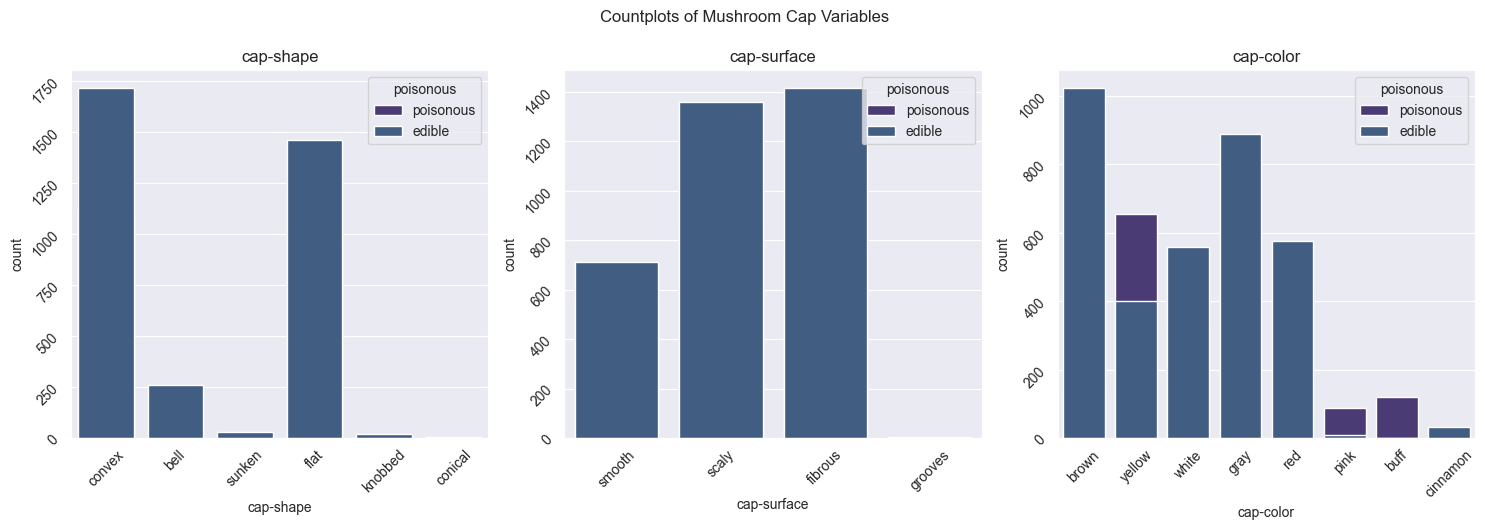

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=len(cap_vars), figsize=(15, 5))

# Iterate over the rows and columns of the grid
for i, col in enumerate(df[cap_vars]):
    sns.countplot(x=col, hue='poisonous', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(col)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout()
fig.suptitle('Countplots of Mushroom Cap Variables', y=1.05)

plt.show()

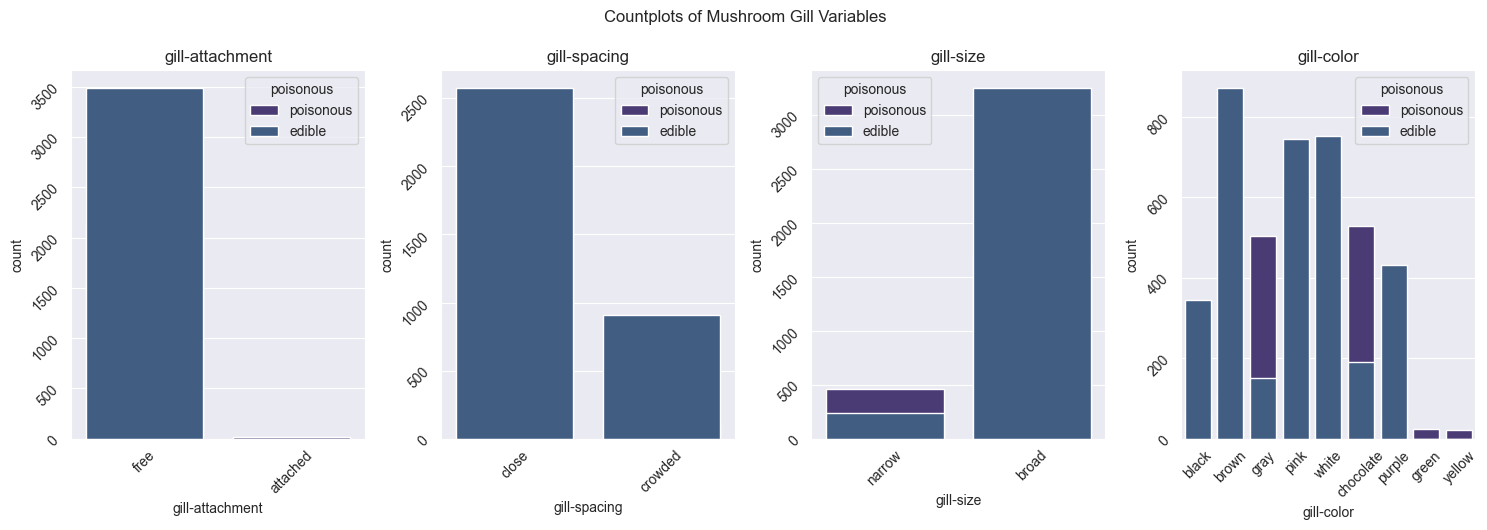

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=len(gill_vars), figsize=(15, 5))

for i, col in enumerate(df[gill_vars]):
    sns.countplot(x=col, hue='poisonous', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(col)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout()
fig.suptitle('Countplots of Mushroom Gill Variables', y=1.05)

plt.show()

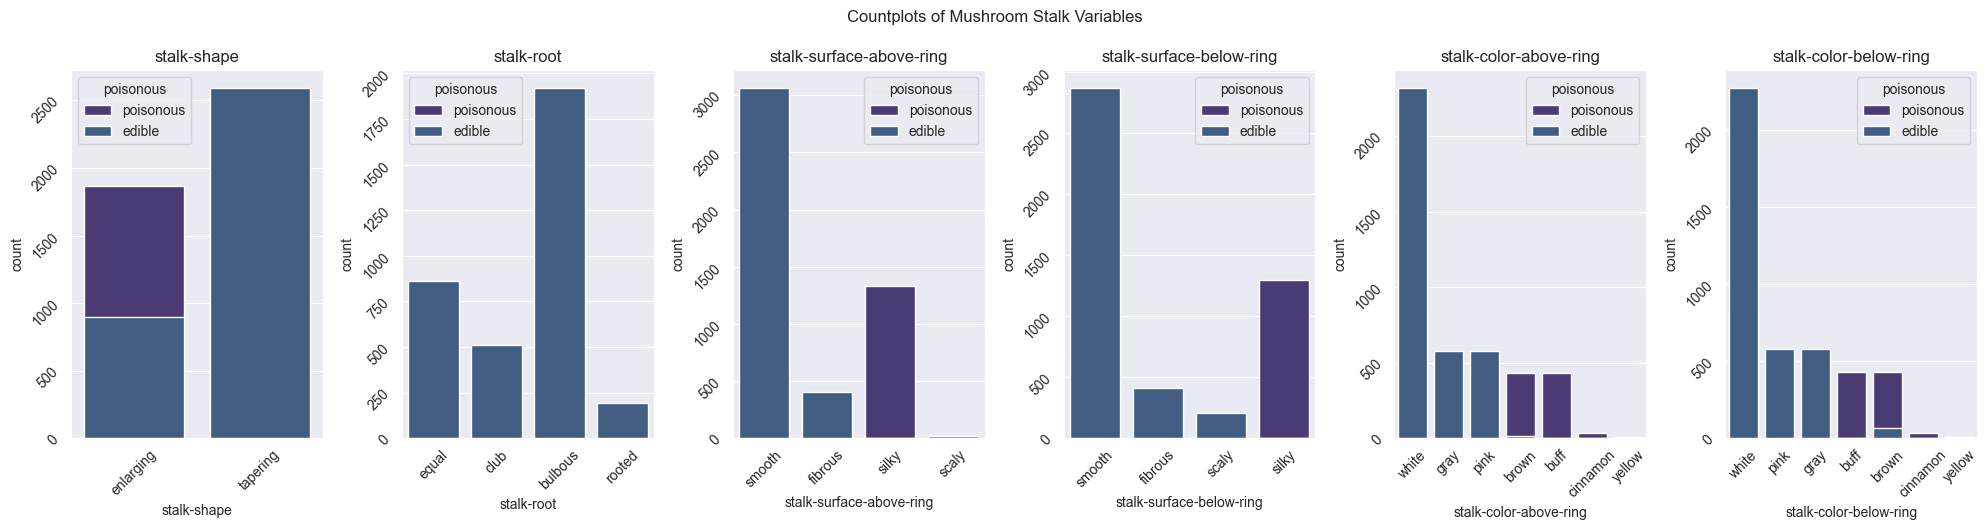

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=len(stalk_vars), figsize=(20, 5))

for i, col in enumerate(df[stalk_vars]):
    sns.countplot(x=col, hue='poisonous', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(col)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout()
fig.suptitle('Countplots of Mushroom Stalk Variables', y=1.05)

plt.show()

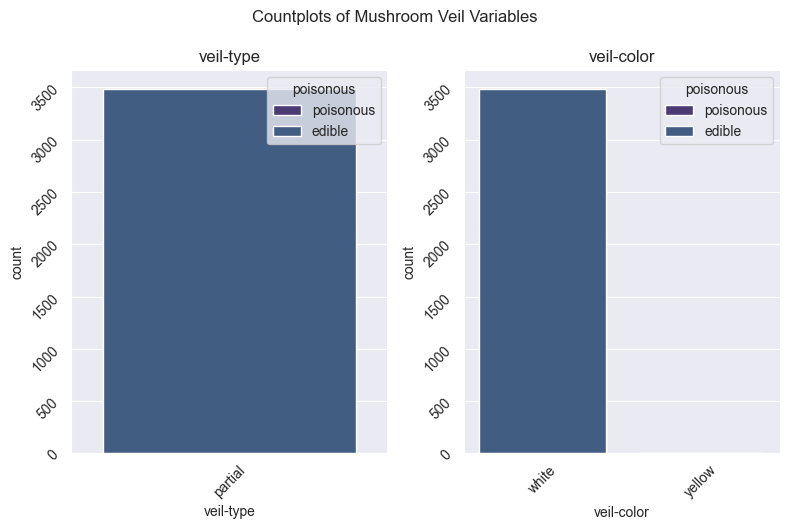

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=len(veil_vars), figsize=(8, 5))

for i, col in enumerate(df[veil_vars]):
    sns.countplot(x=col, hue='poisonous', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(col)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout()
fig.suptitle('Countplots of Mushroom Veil Variables', y=1.05)

plt.show()

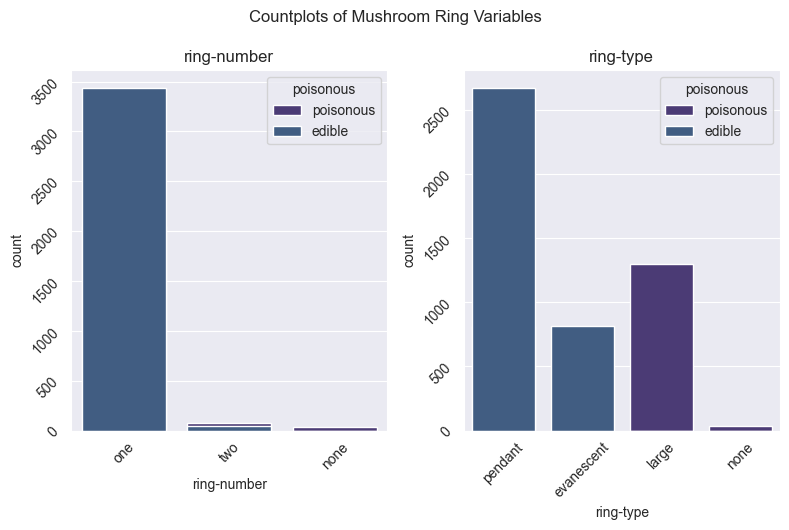

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=len(ring_vars), figsize=(8, 5))

for i, col in enumerate(df[ring_vars]):
    sns.countplot(x=col, hue='poisonous', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(col)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout()
fig.suptitle('Countplots of Mushroom Ring Variables', y=1.05)

plt.show()

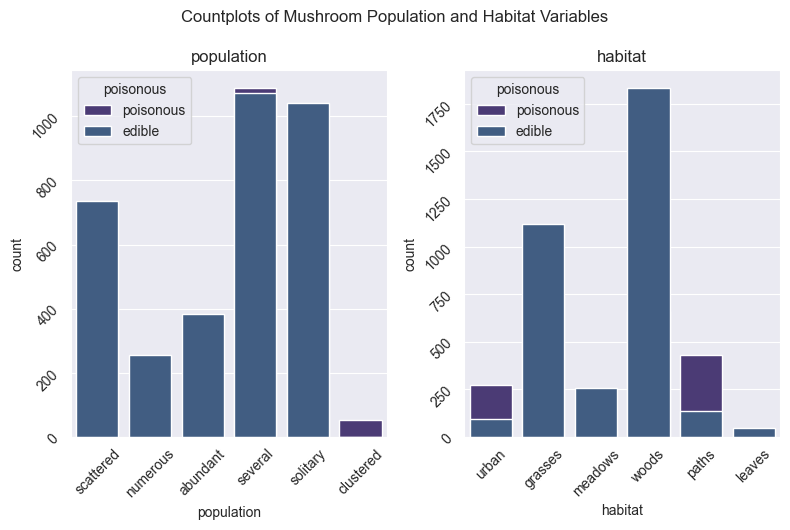

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=len(pop_vars), figsize=(8, 5))

for i, col in enumerate(df[pop_vars]):
    sns.countplot(x=col, hue='poisonous', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(col)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout()
fig.suptitle('Countplots of Mushroom Population and Habitat Variables', y=1.05)

plt.show()

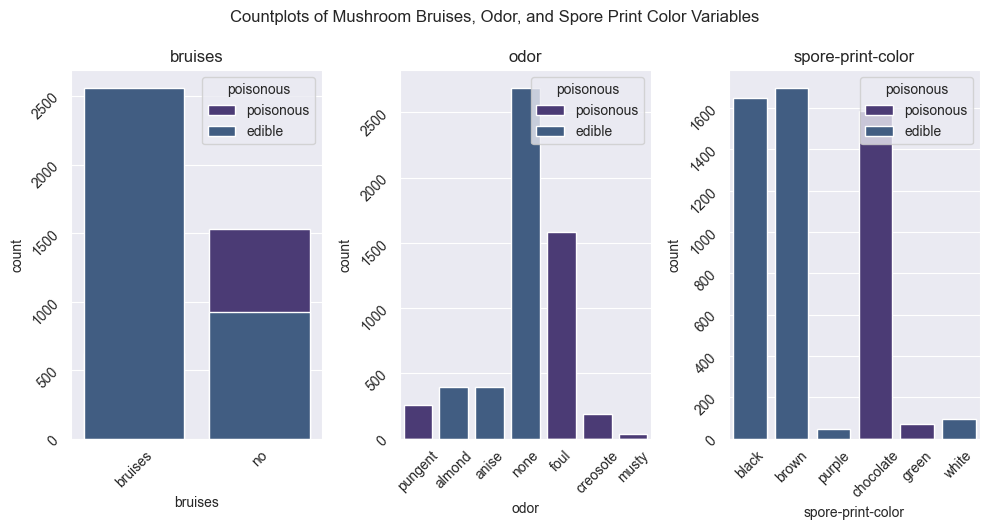

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=len(other_vars), figsize=(10, 5))

for i, col in enumerate(df[other_vars]):
    sns.countplot(x=col, hue='poisonous', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(col)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout()
fig.suptitle('Countplots of Mushroom Bruises, Odor, and Spore Print Color Variables', y=1.05)

plt.show()

# Preprocessing

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
target = ['habitat']

X = df.drop(columns=target)
y = df['habitat']

## Sampling using SMOTEN
https://imbalanced-learn.org/dev/over_sampling.html#smote-variants

habitat
woods      2492
grasses    1860
paths       568
urban       368
meadows     292
leaves       64
Name: count, dtype: int64


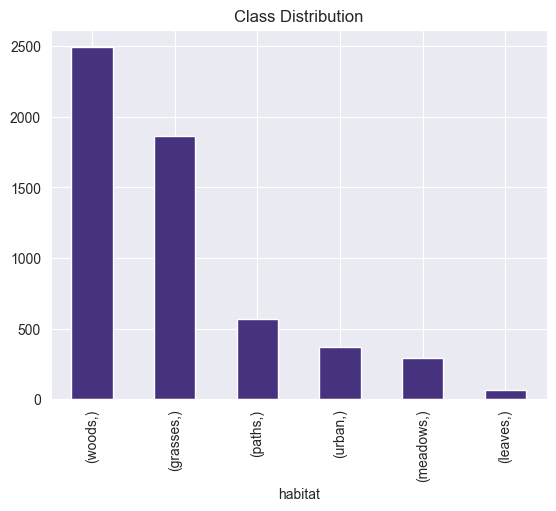

In [83]:
print(df[target].value_counts())

df[target].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.show()

habitat
urban      2492
grasses    2492
meadows    2492
woods      2492
paths      2492
leaves     2492
Name: count, dtype: int64


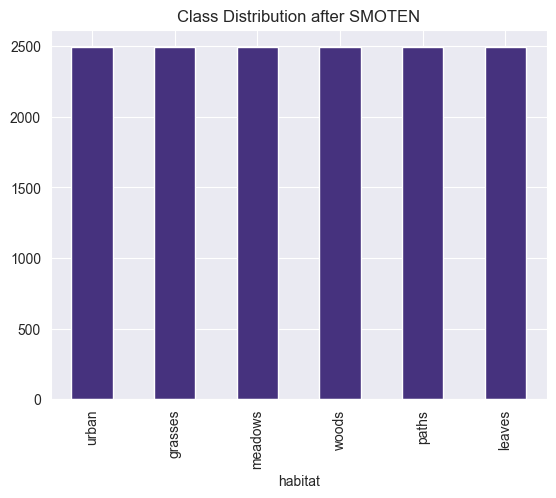

In [84]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
# X_res[y.size:]
# y_res[y.size:]

print(y_res.value_counts())

y_res.value_counts().plot(kind="bar")
plt.title("Class Distribution after SMOTEN")
plt.show()

In [85]:
print(X.shape)
print(y.shape)

print(X_res.shape)
print(y_res.shape)

(5644, 22)
(5644,)
(14952, 22)
(14952,)


In [86]:
#First split to get 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

#Split the training set again to get the validation set (requires calculation the get the needed percentage)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)
# 12.5% of 80% is 10% of the whole dataset (0.125 x 0.8 = 0.1)

print('Training set: ', y_train.shape)
print('Validation set: ', y_val.shape)
print('Testing set: ', y_test.shape)

Training set:  (10465,)
Validation set:  (1496,)
Testing set:  (2991,)


## Chi-square

In [87]:
# chi square for all cols

keep = []

for col in X.columns:
    ct_table_ind=pd.crosstab(X[col], y)
    print('contingency_table :\n',ct_table_ind)

    # compute the chi2 stat and get the value
    c_stat, p, dof, expected = chi2_contingency(ct_table_ind)

    print("Chi2 statistic: ", c_stat)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))

    if p <= alpha:
        print('Dependent (reject H0)')
        keep.append(col)
    else:
        print('Independent (H0 holds true)')

    print()

X  = X[keep]

contingency_table :
 habitat    grasses  leaves  meadows  paths  urban  woods
cap-shape                                               
bell           146       4      146      2      0      2
conical          0       4        0      0      0      0
convex         912      16      128    282    168   1334
flat           802      20       18    282    168   1142
knobbed          0      20        0      2      0     14
sunken           0       0        0      0     32      0
Chi2 statistic:  3181.672569985084
p value is 0.0
Dependent (reject H0)

contingency_table :
 habitat      grasses  leaves  meadows  paths  urban  woods
cap-surface                                               
fibrous          600      24        0    216     96   1224
grooves            0       4        0      0      0      0
scaly            522      36      146    332     64   1120
smooth           738       0      146     20    208    148
Chi2 statistic:  1707.6654476043902
p value is 0.0
Dependent (reject H0)

c

## Encoding
choose the one you need for your algorithm

In [88]:
# Apply one-hot encoding on categorical variables after the split
onehotEncoder = OneHotEncoder()

# for x vals
X_train_onehot = onehotEncoder.fit_transform(X_train)
X_val_onehot = onehotEncoder.transform(X_val)
X_test_onehot = onehotEncoder.transform(X_test)

X_cols_onehot = onehotEncoder.get_feature_names_out()

In [89]:
le = LabelEncoder()

# for x vals
# save row numbers
X_train_rows = len(X_train)
X_val_rows = len(X_val)

X_train_val_test= pd.concat(objs=[X_train, X_val, X_test], axis=0) #concatenate the training, validation, and testing attributes

X_train_val_test_le = X_train_val_test.apply(le.fit_transform) #encode categorical attributes to numerical format

#split the training and testing attributes back into individual variables
X_train_le = X_train_val_test_le[:X_train_rows]
X_val_le = X_train_val_test_le[X_train_rows:X_train_rows + X_val_rows]
X_test_le = X_train_val_test_le[X_train_rows + X_val_rows:]

# Applying Data Mining Techniques
- Logistic Regression
- Linear Discriminant Analysis
- Random Forest
- Support Vector Machine (SVM)
- Naive Bayes

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

In [91]:
sns.set_palette("dark") # better contrast

In [92]:
def print_ROC_scores(y_test, y_prob):
    macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
    weighted_roc_auc_ovo = roc_auc_score(
        y_test, y_prob, multi_class="ovo", average="weighted"
    )
    macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
    weighted_roc_auc_ovr = roc_auc_score(
        y_test, y_prob, multi_class="ovr", average="weighted"
    )
    print(
        "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
    )

    print()

    print(
        "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
    )

In [93]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#plot-roc-curves-for-the-multilabel-problem

In [94]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
target_names = sorted(set(y_test))


def plot_ROC_curve(y_test, y_score, algotitle):
    n_classes = len(np.unique(y_test))
    y_bin = label_binarizer.fit_transform(y_test)

    # Initialize variables for ROC AUC
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    fpr_list, tpr_list = [], []
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr, tpr)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr_micro, tpr_micro)

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate(fpr_list))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr_list[i], tpr_list[i])

    mean_tpr /= n_classes

    roc_auc["macro"] = auc(all_fpr, mean_tpr)

    # Plot ROC curves
    plt.figure(figsize=(8, 6))

    # Plot each class curve
    for i in range(n_classes):
        plt.plot(fpr_list[i], tpr_list[i], label=f'Class {target_names[i]} (AUC = {roc_auc[i]:.2f})')

    # Plot micro and macro average curves
    plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(all_fpr, mean_tpr, label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})',
             color='navy', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve for ' + algotitle)
    plt.legend(loc='best')
    plt.show()

In [95]:
# lists for storing results
accuracy_results = [] # format is algorithm name, validation accuracy, testing accuracy

# evaluations will be done with ROC
# https://www.geeksforgeeks.org/calculate-roc-auc-for-classification-algorithm-such-as-random-forest/
# https://scikit-learn.org/1.0/auto_examples/model_selection/plot_roc.html

In [96]:
class_labels = sorted(set(y_val))

##  Logistic Regression


Validation accuracy score (logistic regression): 0.880
Validation classification report (logistic regression):
              precision    recall  f1-score   support

     grasses       0.87      0.51      0.64       245
      leaves       1.00      1.00      1.00       255
     meadows       0.85      0.96      0.90       254
       paths       0.77      0.96      0.85       259
       urban       0.89      0.99      0.94       247
       woods       0.95      0.85      0.90       236

    accuracy                           0.88      1496
   macro avg       0.89      0.88      0.87      1496
weighted avg       0.89      0.88      0.87      1496

Validation confusion matrix (logistic regression):
[[124   0  44  41  30   6]
 [  0 255   0   0   0   0]
 [ 10   0 244   0   0   0]
 [  6   0   0 249   0   4]
 [  3   0   0   0 244   0]
 [  0   0   0  35   0 201]]


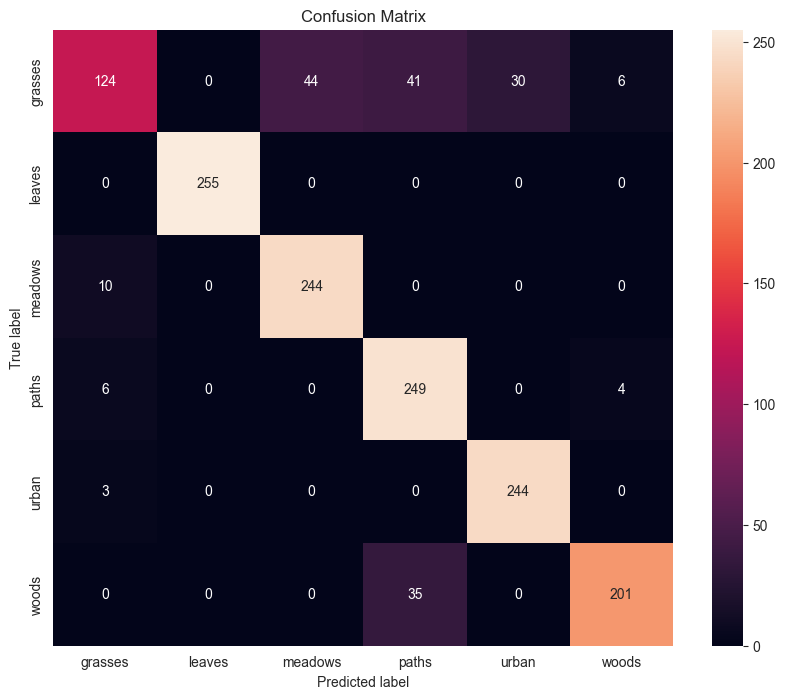

In [97]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_onehot, y_train)

# Predict on the validation set
y_val_pred = logistic_model.predict(X_val_onehot)

logistic_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy score (logistic regression): {:.3f}".format(logistic_accuracy))

logistic_class_report = classification_report(y_val, y_val_pred)
print("Validation classification report (logistic regression):\n{}".format(logistic_class_report))

logistic_confusion_matrix = confusion_matrix(y_val, y_val_pred)
print("Validation confusion matrix (logistic regression):\n{}".format(logistic_confusion_matrix))

# Create a heatmap for the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Test accuracy score (logistic regression): 0.869
Test classification report (logistic regression):
              precision    recall  f1-score   support

     grasses       0.86      0.48      0.62       499
      leaves       1.00      1.00      1.00       458
     meadows       0.88      0.97      0.92       511
       paths       0.71      0.96      0.81       513
       urban       0.89      0.99      0.94       493
       woods       0.95      0.83      0.88       517

    accuracy                           0.87      2991
   macro avg       0.88      0.87      0.86      2991
weighted avg       0.88      0.87      0.86      2991

Test confusion matrix (logistic regression):
[[240   0  70 117  59  13]
 [  0 458   0   0   0   0]
 [ 15   0 496   0   0   0]
 [ 14   0   0 491   0   8]
 [  7   0   0   0 486   0]
 [  2   0   0  88   0 427]]


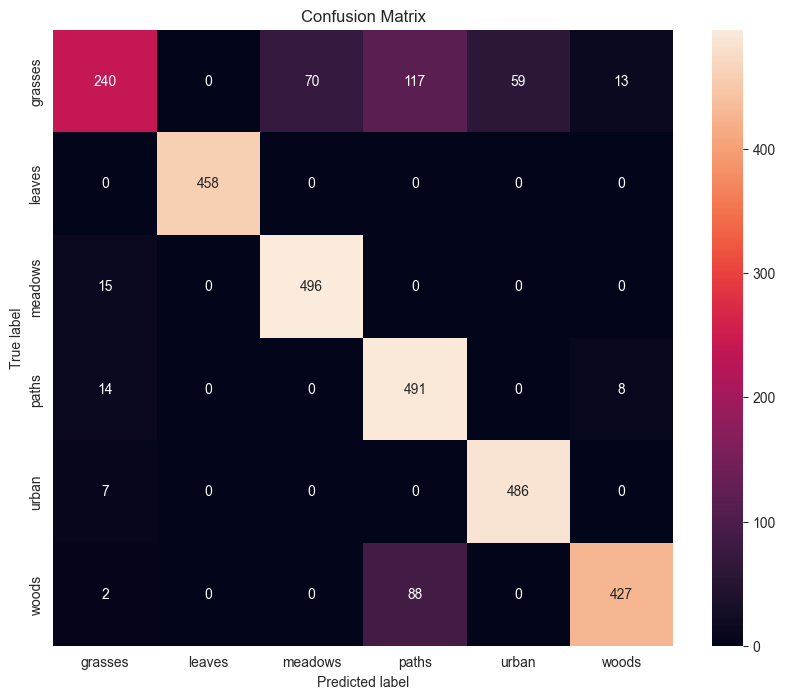

In [98]:
# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test_onehot)

# Compute accuracy score
logistic_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy score (logistic regression): {:.3f}".format(logistic_test_accuracy))

# Compute classification report
logistic_test_class_report = classification_report(y_test, y_test_pred)
print("Test classification report (logistic regression):\n{}".format(logistic_test_class_report))

# Compute confusion matrix
logistic_test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Test confusion matrix (logistic regression):\n{}".format(logistic_test_confusion_matrix))

# Create a heatmap for the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

accuracy_results.append(['Logistic Regression', logistic_accuracy, logistic_test_accuracy])

### ROC for Logistic Regression

One-vs-One ROC AUC scores:
0.969635 (macro),
0.969227 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.969057 (macro),
0.968752 (weighted by prevalence)


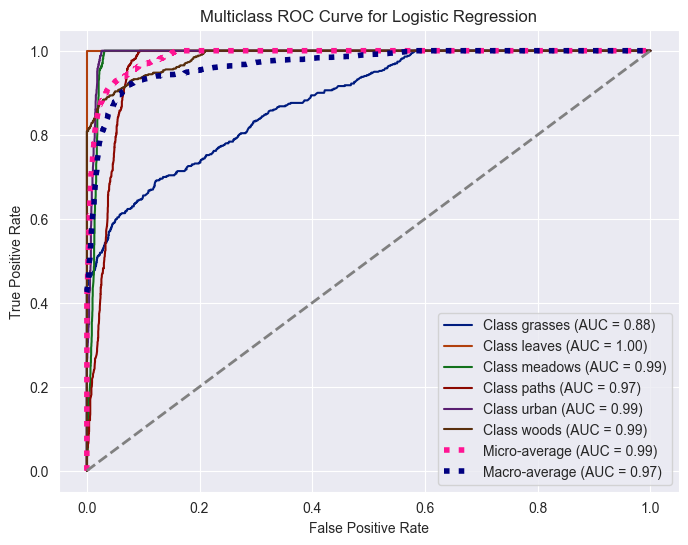

In [99]:
y_proba = logistic_model.predict_proba(X_test_onehot)

print_ROC_scores(y_test, y_proba)
plot_ROC_curve(y_test, y_proba, 'Logistic Regression')


## Linear Discriminant Analysis

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
# Apply Linear Discriminant Analysis (LDA)
lda = LDA()

X_train_lda = X_train_onehot.copy()
X_test_lda = X_test_onehot.copy()
X_val_lda = X_val_onehot.copy()

X_train_lda = lda.fit_transform(X_train_lda.toarray(), y_train)
X_test_lda = lda.transform(X_test_lda.toarray())
X_val_lda = lda.transform(X_val_lda.toarray())

Validation Accuracy: 0.8830213903743316
Validation Classification Report:
               precision    recall  f1-score   support

     grasses       0.83      0.53      0.65       245
      leaves       1.00      1.00      1.00       255
     meadows       0.86      0.95      0.90       254
       paths       0.79      0.95      0.86       259
       urban       0.89      1.00      0.94       247
       woods       0.94      0.86      0.89       236

    accuracy                           0.88      1496
   macro avg       0.88      0.88      0.87      1496
weighted avg       0.88      0.88      0.88      1496

Validation Confusion Matrix:
 [[130   0  38  37  32   8]
 [  0 255   0   0   0   0]
 [ 13   0 241   0   0   0]
 [  7   0   0 246   0   6]
 [  0   0   0   0 247   0]
 [  7   0   0  27   0 202]]


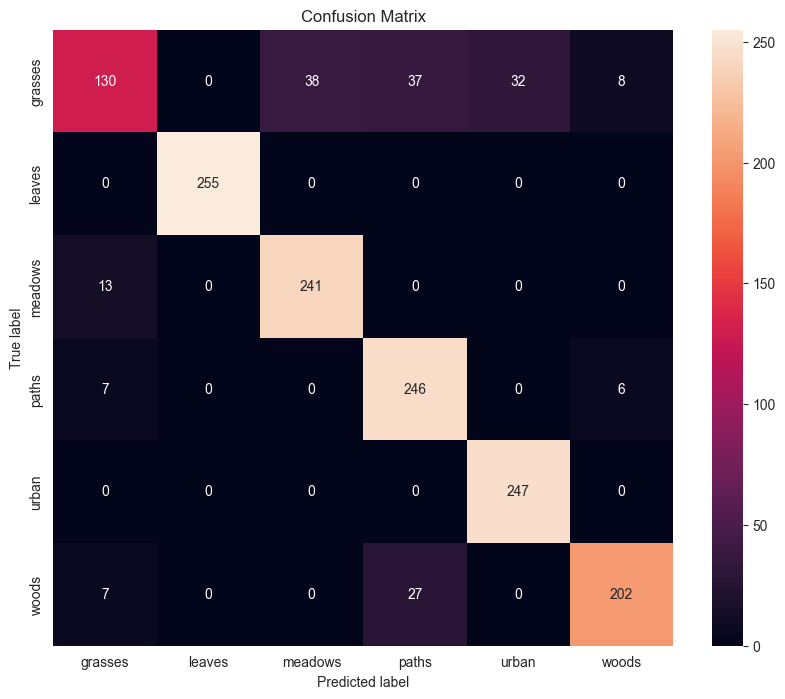

In [102]:
# Train a logistic regression model on the LDA-transformed data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_lda, y_train)

y_val_pred = logistic_model.predict(X_val_lda)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Testing Accuracy: 0.8679371447676363
Testing Classification Report:
               precision    recall  f1-score   support

     grasses       0.81      0.49      0.61       499
      leaves       1.00      1.00      1.00       458
     meadows       0.88      0.96      0.92       511
       paths       0.73      0.93      0.82       513
       urban       0.88      1.00      0.94       493
       woods       0.93      0.84      0.88       517

    accuracy                           0.87      2991
   macro avg       0.87      0.87      0.86      2991
weighted avg       0.87      0.87      0.86      2991

Testing Confusion Matrix:
 [[243   0  65 104  67  20]
 [  0 458   0   0   0   0]
 [ 19   0 492   0   0   0]
 [ 23   0   0 477   0  13]
 [  0   0   0   0 493   0]
 [ 15   0   0  69   0 433]]


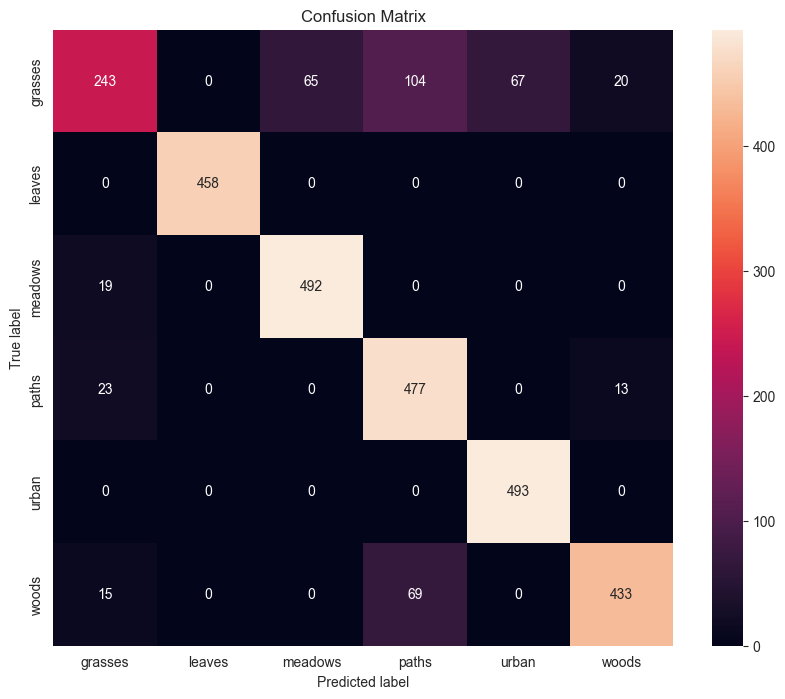

In [103]:
# Make predictions on the validation set
y_pred = logistic_model.predict(X_test_lda)

# Evaluate the model
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Classification Report:\n", classification_report(y_test, y_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

accuracy_results.append(['LDA', accuracy_score(y_val, y_val_pred), accuracy_score(y_test, y_pred)])

### ROC for LDA

One-vs-One ROC AUC scores:
0.969146 (macro),
0.968753 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.968589 (macro),
0.968295 (weighted by prevalence)


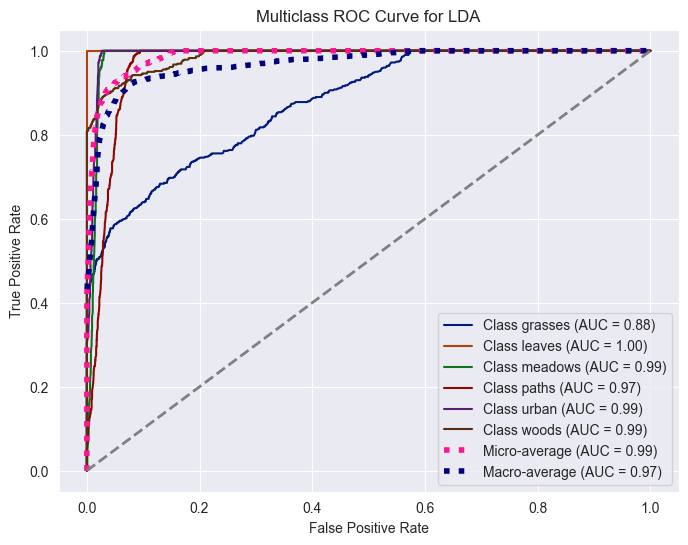

In [104]:
y_proba = logistic_model.predict_proba(X_test_lda)

print_ROC_scores(y_test, y_proba)
plot_ROC_curve(y_test, y_proba, 'LDA')


## Random Forest


In [105]:
from sklearn.ensemble import RandomForestClassifier

[(5, 0.8495989304812834),
 (3, 0.8482620320855615),
 (12, 0.8482620320855615),
 (7, 0.8475935828877005),
 (13, 0.8475935828877005),
 (9, 0.8469251336898396),
 (10, 0.8469251336898396),
 (14, 0.8469251336898396),
 (17, 0.8469251336898396),
 (31, 0.8469251336898396)]

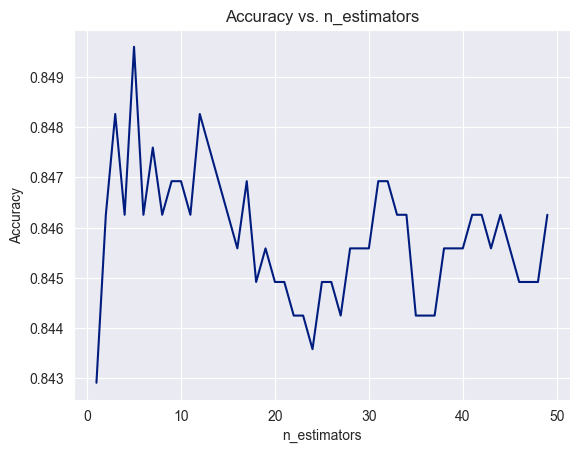

In [106]:
# finding best n_estimators
scores = {}

for i in range(1, 50):
    model = RandomForestClassifier(n_estimators=i, random_state=0)
    model = model.fit(X_train_onehot, y_train)

    y_pred = model.predict(X_val_onehot)

    accuracy = accuracy_score(y_val, y_pred)

    scores[i] = accuracy

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
display(sorted_scores[:10]) # displaying top 10

n_vals = [item[0] for item in sorted_scores]
acc_vals = [item[1] for item in sorted_scores]

# get the best n_estimator
best_n_estimator, best_acccuray = sorted_scores[0]

sns.lineplot(x=n_vals, y=acc_vals)
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

Accuracy score: 0.8495989304812834
Classification Report:
              precision    recall  f1-score   support

     grasses       0.69      0.45      0.54       245
      leaves       1.00      1.00      1.00       255
     meadows       0.82      0.94      0.88       254
       paths       0.75      0.91      0.82       259
       urban       0.89      0.95      0.92       247
       woods       0.92      0.84      0.88       236

    accuracy                           0.85      1496
   macro avg       0.85      0.85      0.84      1496
weighted avg       0.84      0.85      0.84      1496

Confusion Matrix:
[[110   0  51  45  30   9]
 [  0 255   0   0   0   0]
 [ 16   0 238   0   0   0]
 [ 16   0   0 235   0   8]
 [ 12   0   0   0 235   0]
 [  6   0   0  32   0 198]]


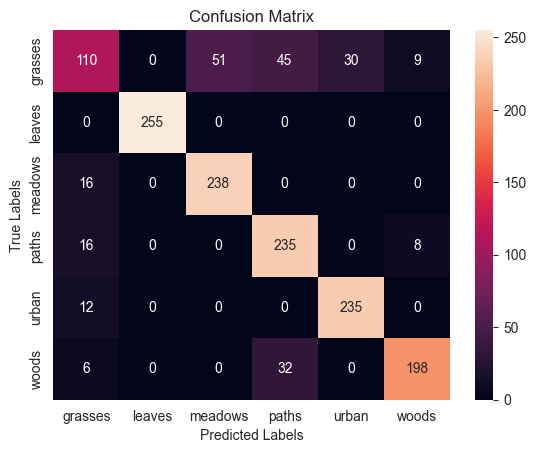

In [107]:
clf_RF = RandomForestClassifier(n_estimators=best_n_estimator, random_state=0)
clf_RF = clf_RF.fit(X_train_onehot, y_train)

y_val_pred = clf_RF.predict(X_val_onehot)

print("Accuracy score:", accuracy_score(y_val, y_val_pred))

# Display classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Display confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(conf_matrix)

# "d" = decimal integers. formats to decimal integers
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy score: 0.8388498829822801
Classification Report:
              precision    recall  f1-score   support

     grasses       0.65      0.46      0.54       499
      leaves       1.00      1.00      1.00       458
     meadows       0.87      0.96      0.91       511
       paths       0.70      0.86      0.77       513
       urban       0.88      0.95      0.91       493
       woods       0.95      0.81      0.87       517

    accuracy                           0.84      2991
   macro avg       0.84      0.84      0.83      2991
weighted avg       0.84      0.84      0.83      2991

Confusion Matrix:
[[232   0  75 118  64  10]
 [  0 458   0   0   0   0]
 [ 22   0 489   0   0   0]
 [ 58   0   0 441   0  14]
 [ 24   0   0   0 469   0]
 [ 23   0   0  74   0 420]]


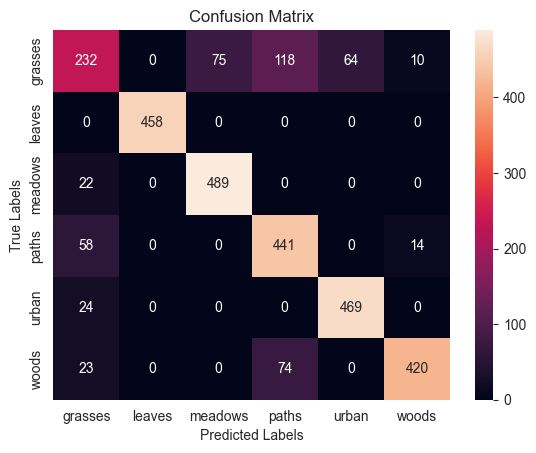

In [108]:
y_pred = clf_RF.predict(X_test_onehot)

print("Accuracy score:", accuracy_score(y_test, y_pred))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Get the unique class labels
class_labels = sorted(set(y_test))

# Plot the heatmap with correct tick labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

accuracy_results.append(['Random Forest Classification', accuracy_score(y_val, y_val_pred), accuracy_score(y_test, y_pred)])

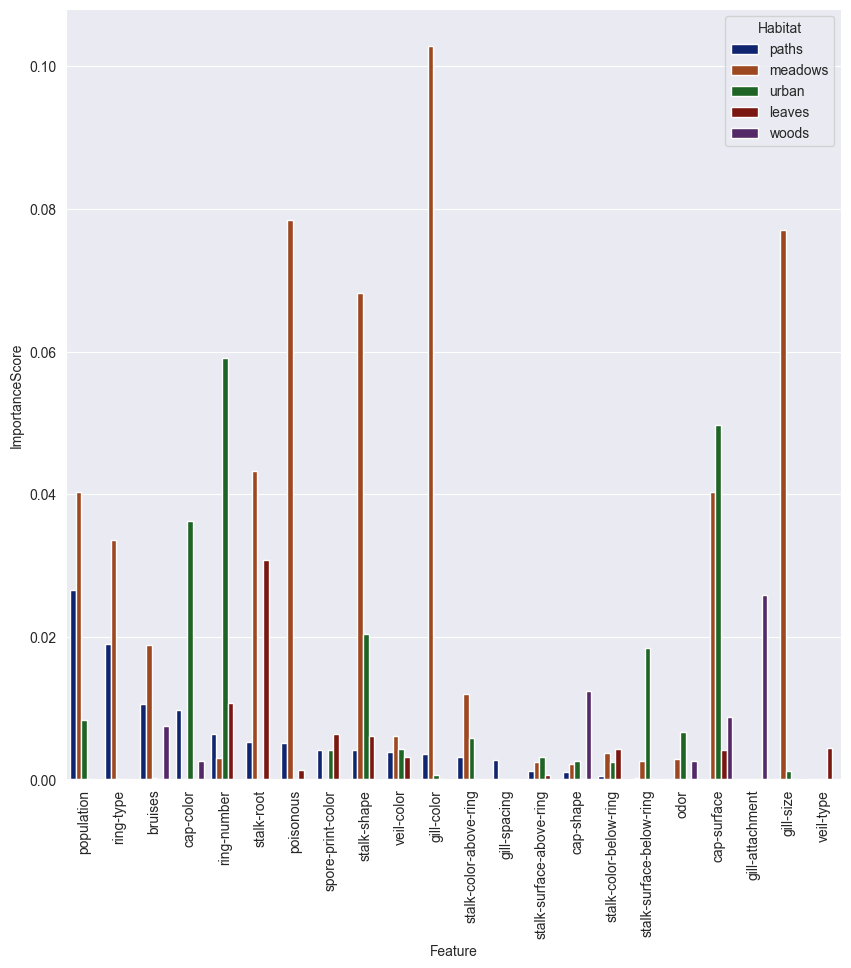

In [109]:
features_data = []

for i, y_output in enumerate(y_test.unique()):
    # in a multi-class problem, this gets the index of the feature importance per class output
    importance_scores = clf_RF.feature_importances_[i * len(X_train.columns):(i + 1) * len(X_train.columns)]
    feature_importance_dict = dict(zip(X_train.columns, importance_scores))

    # Sort features by importance for the current output
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Add data to the list
    for rank, (feature, importance) in enumerate(sorted_features):
        features_data.append({
            'Habitat': y_output,
            'Feature': feature,
            'ImportanceScore': importance,
        })

# Create DataFrame from the list of dictionaries
features_df = pd.DataFrame(features_data)

plt.figure(figsize=(10,10))
sns.barplot(data=features_df, x='Feature', y='ImportanceScore', hue='Habitat')
plt.xticks(rotation=90)
plt.show()

In [110]:
agg_df = features_df.groupby('Habitat', group_keys=False).apply(lambda x: x.nlargest(10, 'ImportanceScore'))
display(agg_df)

,Habitat,Feature,ImportanceScore
66,leaves,stalk-root,0.030817
67,leaves,ring-number,0.010791
68,leaves,spore-print-color,0.006421
69,leaves,stalk-shape,0.006093
70,leaves,veil-type,0.004360
71,leaves,stalk-color-below-ring,0.004338
72,leaves,cap-surface,0.004093
73,leaves,veil-color,0.003159
74,leaves,poisonous,0.001293
75,leaves,stalk-surface-above-ring,0.000595


### ROC for Random Forest

One-vs-One ROC AUC scores:
0.926600 (macro),
0.925870 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.925910 (macro),
0.924936 (weighted by prevalence)


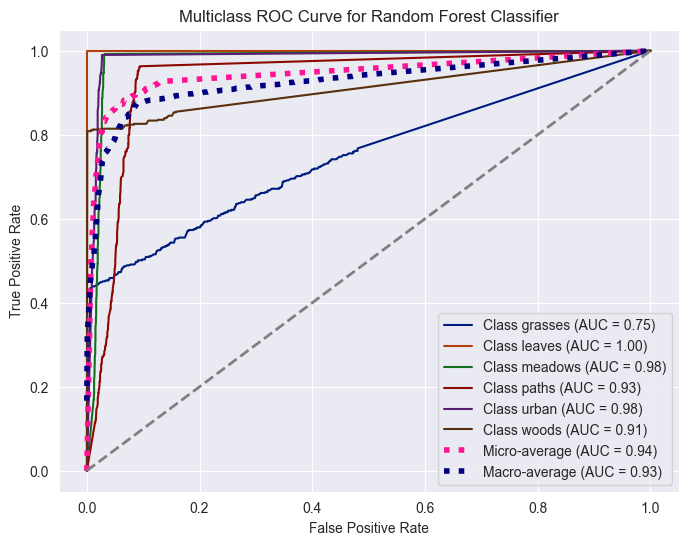

In [111]:
y_proba = clf_RF.predict_proba(X_test_onehot)

print_ROC_scores(y_test, y_proba)
plot_ROC_curve(y_test, y_proba, 'Random Forest Classifier')

## SVM


In [112]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn import svm

### Kernel

LINEAR
Validation Accuracy for linear : 0.8783422459893048 
Accuracy score for linear: 0.8686058174523571
 
Classification Report:
              precision    recall  f1-score   support

     grasses       0.84      0.51      0.63       499
      leaves       1.00      1.00      1.00       458
     meadows       0.90      0.95      0.92       511
       paths       0.68      0.97      0.80       513
       urban       0.90      0.97      0.93       493
       woods       1.00      0.81      0.89       517

    accuracy                           0.87      2991
   macro avg       0.89      0.87      0.86      2991
weighted avg       0.88      0.87      0.86      2991

Confusion Matrix:
[[255   0  56 132  56   0]
 [  0 458   0   0   0   0]
 [ 24   0 487   0   0   0]
 [ 13   0   0 500   0   0]
 [ 13   0   0   0 480   0]
 [  0   0   0  99   0 418]]


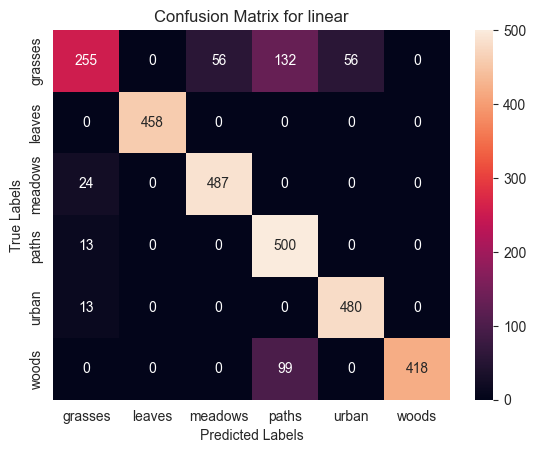

POLY
Validation Accuracy for poly : 0.8656417112299465 
Accuracy score for poly: 0.8595787362086259
 
Classification Report:
              precision    recall  f1-score   support

     grasses       0.92      0.43      0.59       499
      leaves       1.00      1.00      1.00       458
     meadows       0.85      1.00      0.92       511
       paths       0.68      0.98      0.80       513
       urban       0.87      1.00      0.93       493
       woods       1.00      0.76      0.86       517

    accuracy                           0.86      2991
   macro avg       0.89      0.86      0.85      2991
weighted avg       0.88      0.86      0.85      2991

Confusion Matrix:
[[217   0  78 137  67   0]
 [  0 458   0   0   0   0]
 [  0   0 511   0   0   0]
 [  0   0  12 501   0   0]
 [  0   0   0   0 493   0]
 [ 18   0   0 102   6 391]]


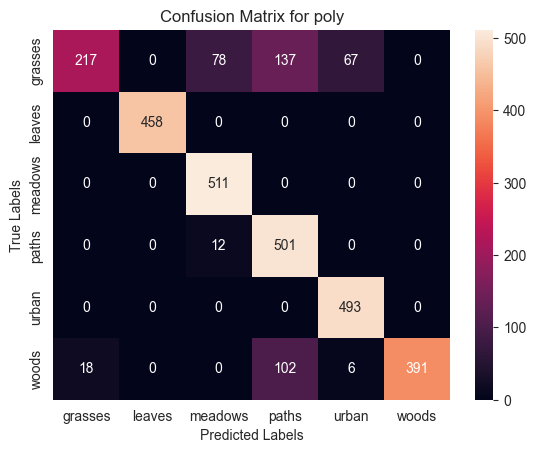

RBF
Validation Accuracy for rbf : 0.8803475935828877 
Accuracy score for rbf: 0.872617853560682
 
Classification Report:
              precision    recall  f1-score   support

     grasses       1.00      0.43      0.61       499
      leaves       1.00      1.00      1.00       458
     meadows       0.87      1.00      0.93       511
       paths       0.68      1.00      0.81       513
       urban       0.88      1.00      0.94       493
       woods       1.00      0.81      0.89       517

    accuracy                           0.87      2991
   macro avg       0.91      0.87      0.86      2991
weighted avg       0.90      0.87      0.86      2991

Confusion Matrix:
[[217   0  78 137  67   0]
 [  0 458   0   0   0   0]
 [  0   0 511   0   0   0]
 [  0   0   0 513   0   0]
 [  0   0   0   0 493   0]
 [  0   0   0  99   0 418]]


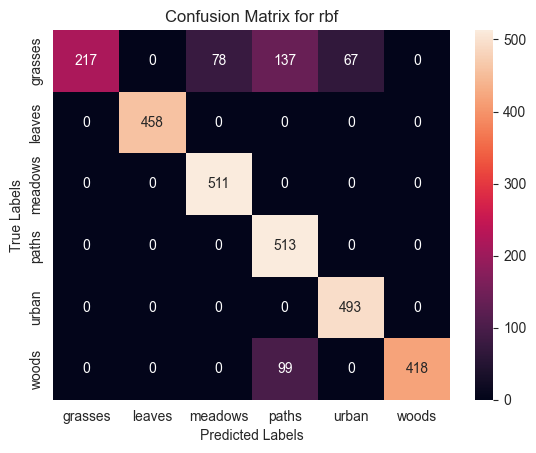

SIGMOID
Validation Accuracy for sigmoid : 0.8803475935828877 
Accuracy score for sigmoid: 0.872617853560682
 
Classification Report:
              precision    recall  f1-score   support

     grasses       1.00      0.43      0.61       499
      leaves       1.00      1.00      1.00       458
     meadows       0.87      1.00      0.93       511
       paths       0.68      1.00      0.81       513
       urban       0.88      1.00      0.94       493
       woods       1.00      0.81      0.89       517

    accuracy                           0.87      2991
   macro avg       0.91      0.87      0.86      2991
weighted avg       0.90      0.87      0.86      2991

Confusion Matrix:
[[217   0  78 137  67   0]
 [  0 458   0   0   0   0]
 [  0   0 511   0   0   0]
 [  0   0   0 513   0   0]
 [  0   0   0   0 493   0]
 [  0   0   0  99   0 418]]


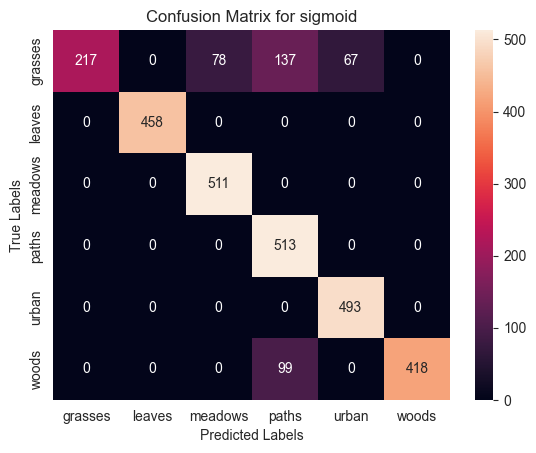

In [113]:
# different kernels available ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

class_labels = ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'woods']

# loop to test all types of kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels_valaccuracyscore = []
kernels_accuracyscore = []

for kernel in kernels:
    print(kernel.upper())

    svc = svm.SVC(kernel=kernel, gamma='auto').fit(X_train_onehot, y_train)

    # Evaluate the model on the validation set
    val_accuracy = svc.score(X_val_onehot.toarray(), y_val)
    print(f"Validation Accuracy for {kernel} : {val_accuracy} ")
    # Append the val accuracy score to the list
    kernels_valaccuracyscore.append(val_accuracy)

    # Predict on the test set
    y_pred = svc.predict(X_test_onehot)
    kernel_predaccuracyscore = accuracy_score(y_test, y_pred)
    print(f"Accuracy score for {kernel}:", kernel_predaccuracyscore)
    kernels_accuracyscore.append(kernel_predaccuracyscore)

    print(" ")

    # Display classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    # Plot the heatmap with correct tick labels
    sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {kernel}')
    plt.show()


In [114]:
kernels_predval_accuracyscore = pd.DataFrame(list(zip(kernels, kernels_valaccuracyscore, kernels_accuracyscore )),
                                             columns=['Kernel', 'Validation Accuracy Score', 'Prediction Accuracy Score'])
display(kernels_predval_accuracyscore)

,Kernel,Validation Accuracy Score,Prediction Accuracy Score
0,linear,0.878342,0.868606
1,poly,0.865642,0.859579
2,rbf,0.880348,0.872618
3,sigmoid,0.880348,0.872618


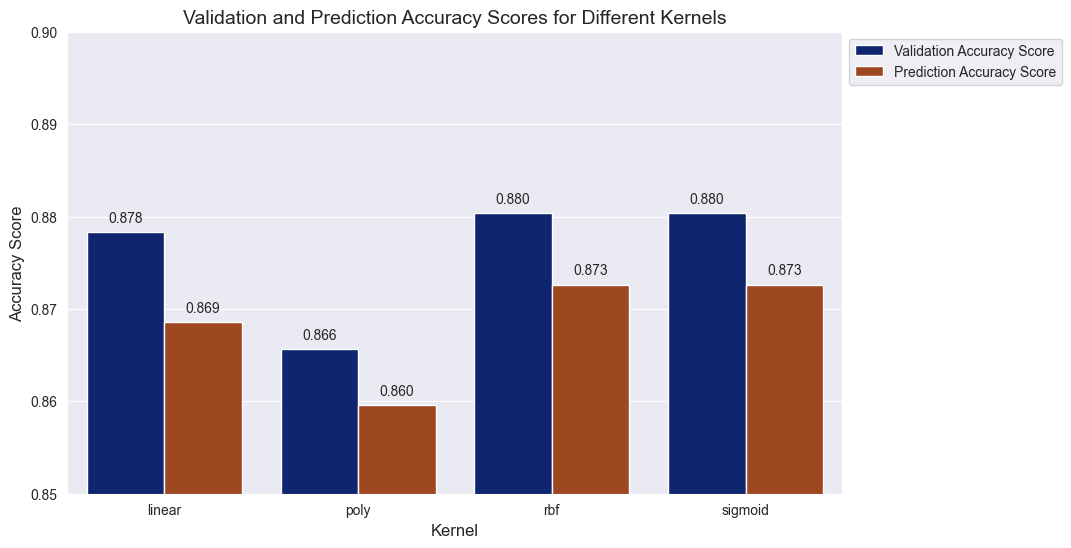

In [115]:
# Melt the DataFrame for visualization
kernels_predval_accuracyscore_melted = pd.melt(kernels_predval_accuracyscore, id_vars='Kernel', var_name='Score Type', value_name='Accuracy Score')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Kernel', y='Accuracy Score', hue='Score Type', data=kernels_predval_accuracyscore_melted)

plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Validation and Prediction Accuracy Scores for Different Kernels', fontsize=14)

# Displaying the accuracy scores on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot

plt.ylim(0.85, 0.9)  # Set y-axis limit for better visualization
plt.show()


### Gamma

In Support Vector Machines (SVM), the gamma parameter is a hyperparameter that defines the influence of a single training example. It affects the shape of the decision boundary and, consequently, the flexibility of the mode

In [116]:
# initialize new lists for gammas accuracy result

# all
kernel = []
kernel_gammas = []
kernel_gammas_valacc = []
kernel_gammas_testacc = []

# displaying only the kernel purposes
rbf_gamma = []
rbf_gamma_valacc = []
rbf_gamma_testacc = []

poly_gamma = []
poly_gamma_valacc = []
poly_gamma_testacc = []

sigmoid_gamma = []
sigmoid_gamma_valacc = []
sigmoid_gamma_testacc = []

#### RBF Kernel (kernel='rbf' or Gaussian kernel):

The gamma parameter defines how far the influence of a single training example reaches. Low values mean a far reach, and high values mean a close reach. In other words, a small gamma will result in a more smooth decision boundary, while a large gamma will make the decision boundary more dependent on individual data points.

In [117]:
# rbf
gammas = [0.1, 1, 10, 50, 100]

for gamma in gammas:

    # Append in list to display
    kernel.append('rbf')
    kernel_gammas.append(str(gamma))
    rbf_gamma.append(str(gamma))

    # Fit in SVC
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X_train_onehot, y_train)

    # Validation Accuraccy
    val_accuracy = svc.score(X_val_onehot.toarray(), y_val)
    print("Validation Accuracy for RBF Kernel of " + str(gamma) + " :" , val_accuracy)
    kernel_gammas_valacc.append(val_accuracy)
    rbf_gamma_valacc.append(val_accuracy)

    # Test Accuracy
    y_pred = svc.predict(X_test_onehot)
    pred_accuracy = accuracy_score(y_test, y_pred)
    print("Prediction Accuracy for RBF Kernel of " + str(gamma) + " :" , pred_accuracy)
    kernel_gammas_testacc.append(pred_accuracy)
    rbf_gamma_testacc.append(pred_accuracy)


Validation Accuracy for RBF Kernel of 0.1 : 0.8703208556149733
Prediction Accuracy for RBF Kernel of 0.1 : 0.8692744901370779
Validation Accuracy for RBF Kernel of 1 : 0.8422459893048129
Prediction Accuracy for RBF Kernel of 1 : 0.8428619190906051
Validation Accuracy for RBF Kernel of 10 : 0.7774064171122995
Prediction Accuracy for RBF Kernel of 10 : 0.7766633233032431
Validation Accuracy for RBF Kernel of 50 : 0.7774064171122995
Prediction Accuracy for RBF Kernel of 50 : 0.7766633233032431
Validation Accuracy for RBF Kernel of 100 : 0.7774064171122995
Prediction Accuracy for RBF Kernel of 100 : 0.7766633233032431


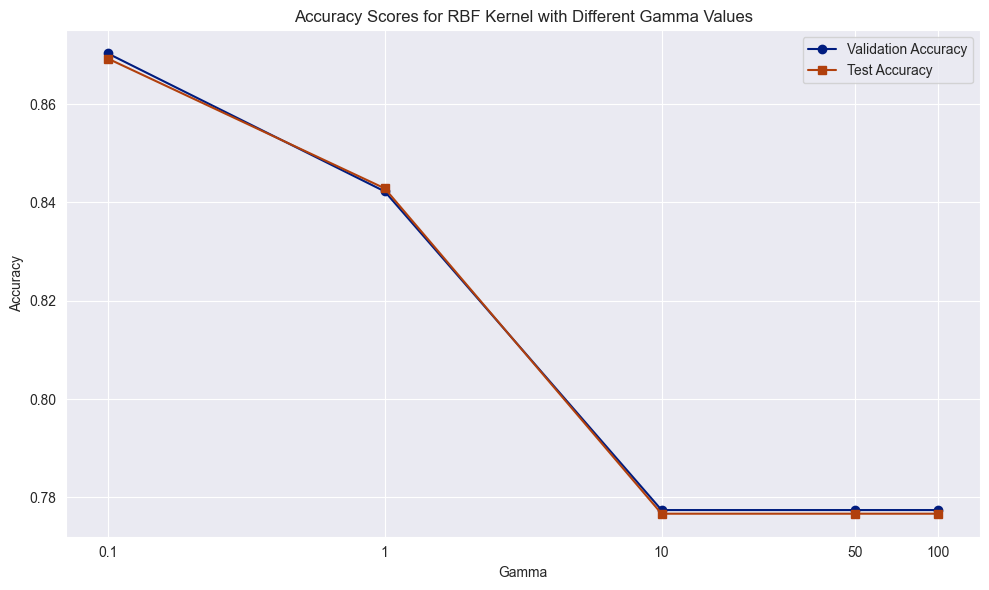

In [118]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(gammas, rbf_gamma_valacc , marker='o', label='Validation Accuracy')

# Plot test accuracy
plt.plot(gammas, rbf_gamma_testacc, marker='s', label='Test Accuracy')

# Adding labels and title
plt.title('Accuracy Scores for RBF Kernel with Different Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.xticks(gammas, gammas)  # Set gamma values as ticks on x-axis
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


#### Polynomial Kernel (kernel='poly'):

The gamma parameter influences the shape of the decision boundary. It is related to the inverse of the radius of influence of samples selected by the model. Larger gamma values lead to more complex decision boundaries.

In [119]:
# poly kernel
gammas = [0.1, 0.2, 0.4] ## it took a while for 10

for gamma in gammas:

    # Append in list to display
    kernel.append('poly')
    kernel_gammas.append(str(gamma))
    poly_gamma.append(str(gamma))

    # Fit in SVM
    svc = svm.SVC(kernel='poly', gamma=gamma).fit(X_train_onehot, y_train)

    # Validation Accuraccy
    val_accuracy = svc.score(X_val_onehot.toarray(), y_val)
    print("Validation Accuracy for Poly Kernel of " + str(gamma) + " :" , val_accuracy)
    kernel_gammas_valacc.append(val_accuracy)
    poly_gamma_valacc.append(val_accuracy)

    # Test Accuracy
    y_pred = svc.predict(X_test_onehot)
    pred_accuracy = accuracy_score(y_test, y_pred)
    print("Prediction Accuracy for Poly Kernel of " + str(gamma) + " :" , pred_accuracy)
    kernel_gammas_testacc.append(pred_accuracy)
    poly_gamma_testacc.append(pred_accuracy)


Validation Accuracy for Poly Kernel of 0.1 : 0.8729946524064172
Prediction Accuracy for Poly Kernel of 0.1 : 0.8615847542627884
Validation Accuracy for Poly Kernel of 0.2 : 0.8656417112299465
Prediction Accuracy for Poly Kernel of 0.2 : 0.8602474088933467
Validation Accuracy for Poly Kernel of 0.4 : 0.858957219251337
Prediction Accuracy for Poly Kernel of 0.4 : 0.8562353727850217


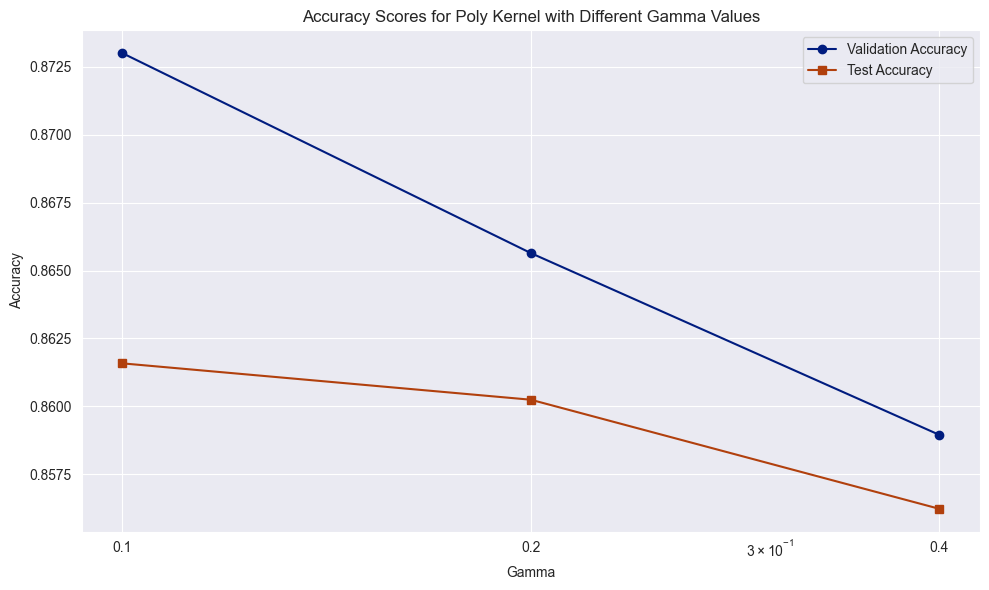

In [120]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(gammas, poly_gamma_valacc , marker='o', label='Validation Accuracy')

# Plot test accuracy
plt.plot(gammas, poly_gamma_testacc, marker='s', label='Test Accuracy')

# Adding labels and title
plt.title('Accuracy Scores for Poly Kernel with Different Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.xticks(gammas, gammas)  # Set gamma values as ticks on x-axis
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

#### Sigmoid Kernel (kernel='sigmoid'):

Similar to the RBF kernel, the gamma parameter influences the shape of the decision boundary in the sigmoid kernel. A smaller gamma value will result in a smoother decision boundary.

In [121]:
# sigmoid kernel

gammas = [0.1, 1, 10, 50, 100]

for gamma in gammas:

    # Append in list to display
    kernel.append('sigmoid')
    kernel_gammas.append(str(gamma))
    sigmoid_gamma.append(str(gamma))

    # Fit in SVM
    svc = svm.SVC(kernel='sigmoid', gamma=gamma).fit(X_train_onehot, y_train)

    # Validation Accuraccy
    val_accuracy = svc.score(X_val_onehot.toarray(), y_val)
    print("Validation Accuracy for Sigmoid Kernel of " + str(gamma) + " :" , val_accuracy)
    kernel_gammas_valacc.append(val_accuracy)
    sigmoid_gamma_valacc.append(val_accuracy)

    # Test Accuracy
    y_pred = svc.predict(X_test_onehot)
    pred_accuracy = accuracy_score(y_test, y_pred)
    print("Prediction Accuracy for Sigmoid Kernel of " + str(gamma) + " :" , pred_accuracy)
    kernel_gammas_testacc.append(pred_accuracy)
    sigmoid_gamma_testacc.append(pred_accuracy)



Validation Accuracy for Sigmoid Kernel of 0.1 : 0.641042780748663
Prediction Accuracy for Sigmoid Kernel of 0.1 : 0.6456034770979605
Validation Accuracy for Sigmoid Kernel of 1 : 0.17045454545454544
Prediction Accuracy for Sigmoid Kernel of 1 : 0.15312604480106987
Validation Accuracy for Sigmoid Kernel of 10 : 0.17045454545454544
Prediction Accuracy for Sigmoid Kernel of 10 : 0.15312604480106987
Validation Accuracy for Sigmoid Kernel of 50 : 0.17045454545454544
Prediction Accuracy for Sigmoid Kernel of 50 : 0.15312604480106987
Validation Accuracy for Sigmoid Kernel of 100 : 0.17045454545454544
Prediction Accuracy for Sigmoid Kernel of 100 : 0.15312604480106987


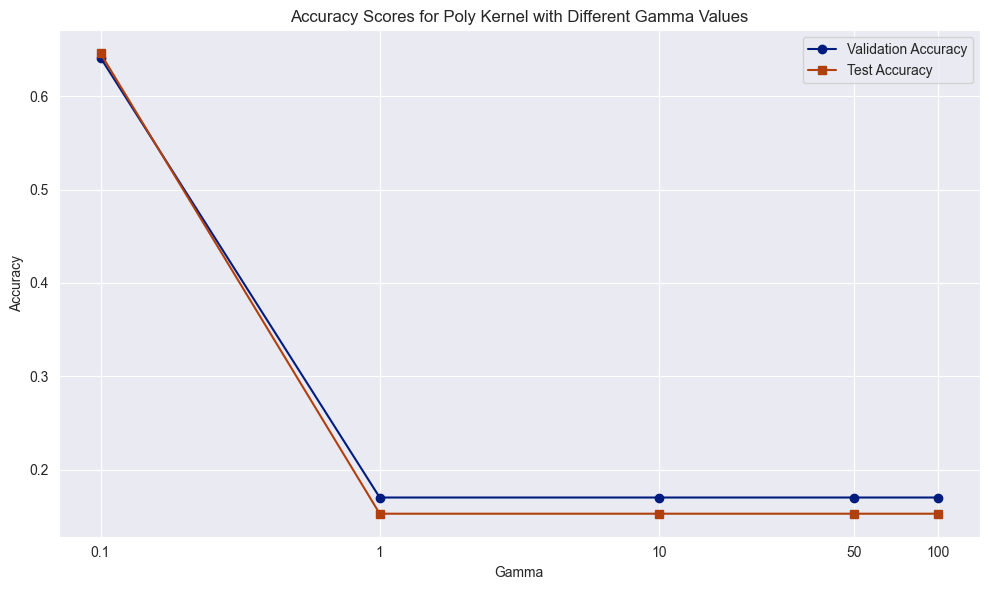

In [122]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(gammas, sigmoid_gamma_valacc , marker='o', label='Validation Accuracy')

# Plot test accuracy
plt.plot(gammas, sigmoid_gamma_testacc, marker='s', label='Test Accuracy')

# Adding labels and title
plt.title('Accuracy Scores for Poly Kernel with Different Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.xticks(gammas, gammas)  # Set gamma values as ticks on x-axis
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [123]:
# Displaying the different kernels and different value for gammas
gamma_predval_accuracyscore = pd.DataFrame(list(zip(kernel, kernel_gammas, kernel_gammas_valacc, kernel_gammas_testacc )),
                                             columns=['Kernel', 'Gamma Value', 'Validation Accuracy Score', 'Prediction Accuracy Score'])

display(gamma_predval_accuracyscore)

# Find the maximum validation accuracy score and its corresponding row
max_valacc_row = gamma_predval_accuracyscore.loc[gamma_predval_accuracyscore['Validation Accuracy Score'].idxmax()]

# Find the maximum prediction accuracy score and its corresponding row
max_testacc_row = gamma_predval_accuracyscore.loc[gamma_predval_accuracyscore['Prediction Accuracy Score'].idxmax()]

# Display the rows with maximum scores
print("Maximum Validation Accuracy Score:")
print(max_valacc_row)

print("\nMaximum Prediction Accuracy Score:")
print(max_testacc_row)


,Kernel,Gamma Value,Validation Accuracy Score,Prediction Accuracy Score
0,rbf,0.1,0.870321,0.869274
1,rbf,1,0.842246,0.842862
2,rbf,10,0.777406,0.776663
3,rbf,50,0.777406,0.776663
4,rbf,100,0.777406,0.776663
5,poly,0.1,0.872995,0.861585
6,poly,0.2,0.865642,0.860247
7,poly,0.4,0.858957,0.856235
8,sigmoid,0.1,0.641043,0.645603
9,sigmoid,1,0.170455,0.153126


Maximum Validation Accuracy Score:
Kernel                           poly
Gamma Value                       0.1
Validation Accuracy Score    0.872995
Prediction Accuracy Score    0.861585
Name: 5, dtype: object

Maximum Prediction Accuracy Score:
Kernel                            rbf
Gamma Value                       0.1
Validation Accuracy Score    0.870321
Prediction Accuracy Score    0.869274
Name: 0, dtype: object


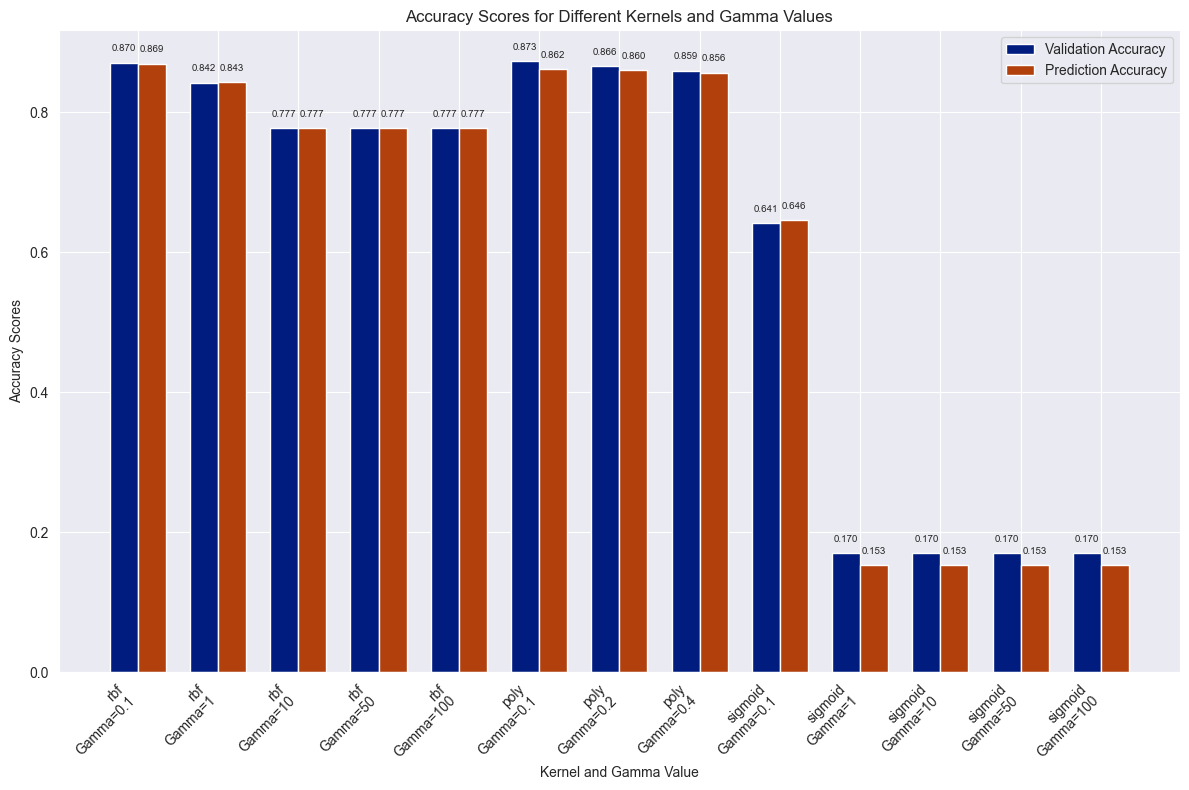

In [124]:
# Plotting
bar_width = 0.35
index = np.arange(len(kernel_gammas_valacc))

fig, ax = plt.subplots(figsize=(12, 8))

# Plot validation accuracy scores
val_bars = ax.bar(index - bar_width/2, kernel_gammas_valacc, bar_width, label='Validation Accuracy')

# Plot prediction accuracy scores
pred_bars = ax.bar(index + bar_width/2, kernel_gammas_testacc, bar_width, label='Prediction Accuracy')

# Adding labels and title
ax.set_xlabel('Kernel and Gamma Value')
ax.set_ylabel('Accuracy Scores')
ax.set_title('Accuracy Scores for Different Kernels and Gamma Values')
ax.set_xticks(index)
ax.set_xticklabels([f'{kernel[i]}\nGamma={kernel_gammas[i]}' for i in range(len(kernel_gammas))])
ax.legend()

# Displaying the accuracy scores on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


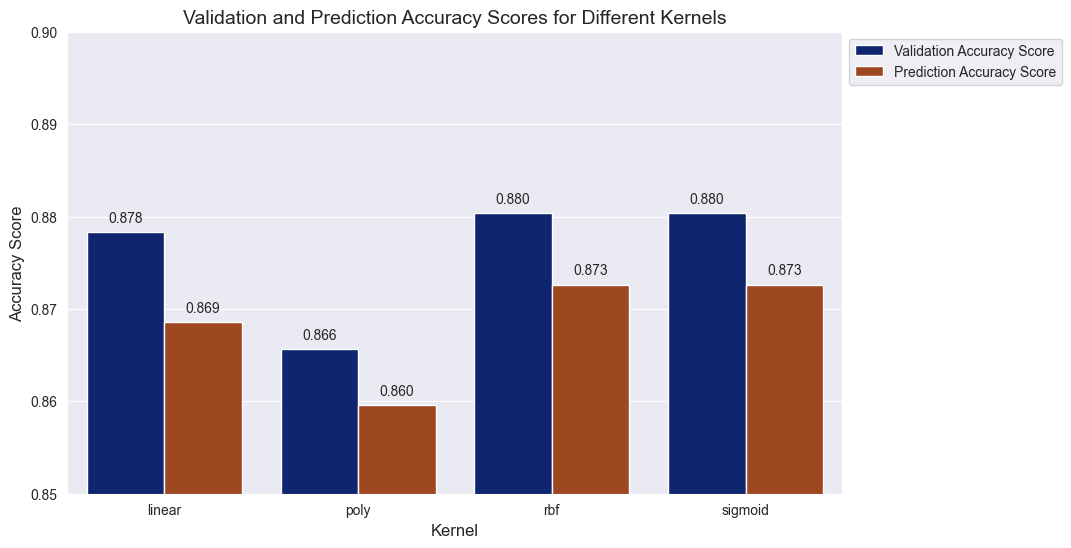

In [125]:
# Plotting back the graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Kernel', y='Accuracy Score', hue='Score Type', data=kernels_predval_accuracyscore_melted)

plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Validation and Prediction Accuracy Scores for Different Kernels', fontsize=14)

# Displaying the accuracy scores on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot

plt.ylim(0.85, 0.9)  # Set y-axis limit for better visualization
plt.show()


In [126]:
display(kernels_predval_accuracyscore)

# Find the row with maximum validation accuracy score
max_valacc_row = kernels_predval_accuracyscore.loc[kernels_predval_accuracyscore['Validation Accuracy Score'].idxmax()]

# Find the row with maximum prediction accuracy score
max_testacc_row = kernels_predval_accuracyscore.loc[kernels_predval_accuracyscore['Prediction Accuracy Score'].idxmax()]

# Display the rows with maximum scores
print("Maximum Validation Accuracy Score:")
print(max_valacc_row)

print("\nMaximum Prediction Accuracy Score:")
print(max_testacc_row)


,Kernel,Validation Accuracy Score,Prediction Accuracy Score
0,linear,0.878342,0.868606
1,poly,0.865642,0.859579
2,rbf,0.880348,0.872618
3,sigmoid,0.880348,0.872618


Maximum Validation Accuracy Score:
Kernel                            rbf
Validation Accuracy Score    0.880348
Prediction Accuracy Score    0.872618
Name: 2, dtype: object

Maximum Prediction Accuracy Score:
Kernel                            rbf
Validation Accuracy Score    0.880348
Prediction Accuracy Score    0.872618
Name: 2, dtype: object


### ROC for SVM with 'RBF' Kernel

Highest consistent accuracy for SVM in all its parameters is for 'rbf'

One-vs-One ROC AUC scores:
0.966917 (macro),
0.966445 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.966252 (macro),
0.965893 (weighted by prevalence)


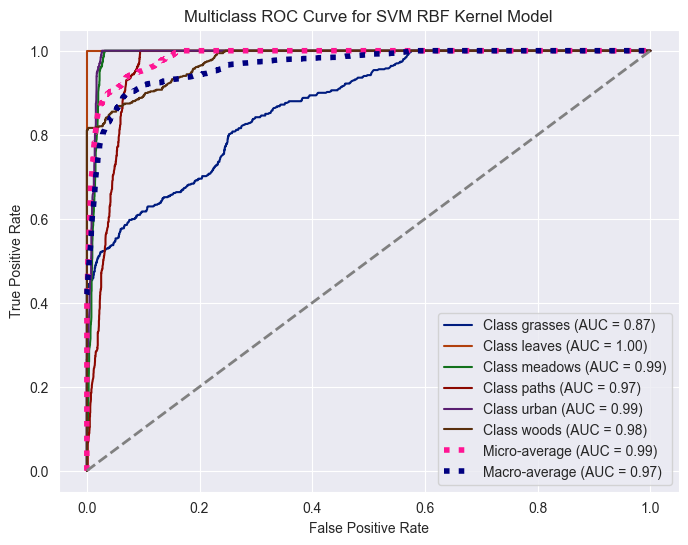

In [127]:
# Picking SVM kernel 'rbf'
# include probability=True to make it work
svm_model = SVC(kernel='rbf', gamma='auto', probability=True)

svm_model = svm_model.fit(X_train_onehot, y_train)

# Printing ROC Curves
y_proba = svm_model.predict_proba(X_test_onehot)

print_ROC_scores(y_test, y_proba)
plot_ROC_curve(y_test, y_proba, 'SVM RBF Kernel Model')

# doesnt work properly
#---------------------------------------------------------------------------
#AttributeError                            Traceback (most recent call last)
#<ipython-input-53-10ac9a9af49d> in <cell line: 7>()
#      5
#      6 # Printing ROC Curves
#----> 7 y_proba = svm_model.predict_proba(X_test_onehot)
#      8
#      9 print_ROC_scores(y_test, y_proba)
#
#1 frames
#/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py in _check_proba(self)
#    827     def _check_proba(self):
#    828         if not self.probability:
#--> 829             raise AttributeError(
#    830                 "predict_proba is not available when  probability=False"
#    831             )

#AttributeError: predict_proba is not available when  probability=False

In [128]:
svm_model = SVC(kernel='rbf', gamma='auto')

accuracy_results.append(['Support Vector Machine (RBF)',  svm_model.score(X_val_onehot.toarray(), y_val), svm_model.score(X_test_onehot.toarray(), y_test)])


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

Classification Report:
              precision    recall  f1-score   support

     grasses       0.83      0.43      0.56       245
      leaves       1.00      1.00      1.00       255
     meadows       0.79      1.00      0.88       254
       paths       0.69      0.75      0.72       259
       urban       0.67      1.00      0.80       247
       woods       1.00      0.61      0.75       236

    accuracy                           0.80      1496
   macro avg       0.83      0.80      0.79      1496
weighted avg       0.83      0.80      0.79      1496

Confusion Matrix:
[[0.42857143 0.         0.2122449  0.19183673 0.16734694 0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.06177606 0.74517375 0.19305019 0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.09322034 0.         0.         0.16949153 0.13135593 0.6059322 ]] 


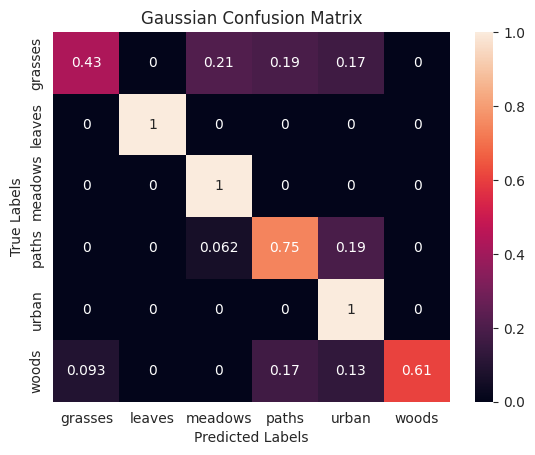

In [ ]:
Gnb = GaussianNB()
Gnb.fit(X_train_le, y_train)
Gnb_pred = Gnb.predict(X_val_le)

# VALIDATION

#classification report
print("Classification Report:")
print(classification_report(y_val, Gnb_pred,target_names=class_labels))

#confusion matrix
print("Confusion Matrix:")
Gnb_conf_mat = confusion_matrix(y_val, Gnb_pred, normalize='true')
print(Gnb_conf_mat,'\n')

#heat map
sns.heatmap(Gnb_conf_mat, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gaussian Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

     grasses       0.83      0.43      0.57       499
      leaves       1.00      1.00      1.00       458
     meadows       0.83      1.00      0.91       511
       paths       0.65      0.79      0.71       513
       urban       0.68      1.00      0.81       493
       woods       1.00      0.61      0.76       517

    accuracy                           0.80      2991
   macro avg       0.83      0.81      0.79      2991
weighted avg       0.83      0.80      0.79      2991

Confusion Matrix:
[[0.43486974 0.         0.15631263 0.22845691 0.18036072 0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.04873294 0.78752437 0.16374269 0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.08704062 0.         0.         0.19729207 0.10444874 0.61121857]] 


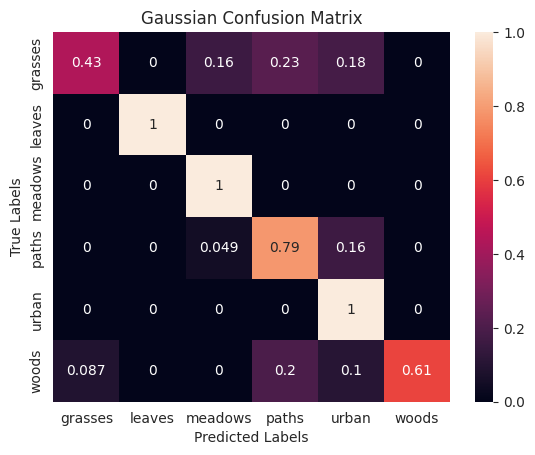

In [ ]:
Gnb_pred = Gnb.predict(X_test_le)

#classification report
print("Classification Report:")
print(classification_report(y_test, Gnb_pred,target_names=class_labels))

#confusion matrix
print("Confusion Matrix:")
Gnb_conf_mat = confusion_matrix(y_test, Gnb_pred, normalize='true')
print(Gnb_conf_mat,'\n')

#heat map
sns.heatmap(Gnb_conf_mat, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gaussian Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

     grasses       0.70      0.47      0.56       245
      leaves       1.00      1.00      1.00       255
     meadows       0.81      1.00      0.90       254
       paths       0.70      0.77      0.73       259
       urban       0.88      1.00      0.94       247
       woods       0.93      0.79      0.86       236

    accuracy                           0.84      1496
   macro avg       0.84      0.84      0.83      1496
weighted avg       0.84      0.84      0.83      1496

Confusion Matrix:
[[0.46530612 0.         0.2122449  0.19183673 0.13061224 0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.15444015 0.         0.02316602 0.76833977 0.         0.05405405]
 [0.         0.         0.         0.         1.         0.        ]
 [0.03389831 0.         0.         0.16525424 0.00847458 0.79237288]] 


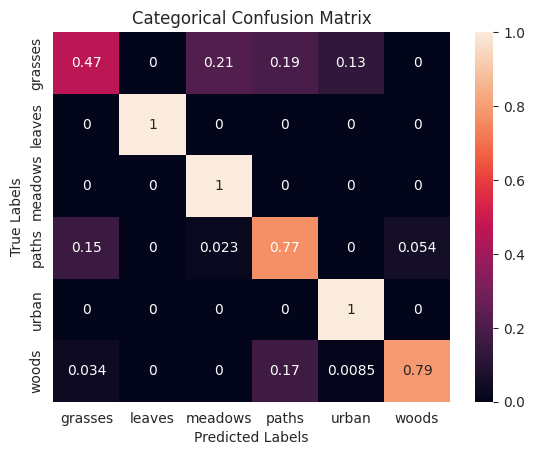

In [ ]:
Cnb = CategoricalNB()
Cnb.fit(X_train_le, y_train)
Cnb_pred = Cnb.predict(X_val_le)

#classification report
print("Classification Report:")
print(classification_report(y_val, Cnb_pred,target_names=class_labels))

#confusion matrix
print("Confusion Matrix:")
Cnb_conf_mat = confusion_matrix(y_val, Cnb_pred, normalize='true')
print(Cnb_conf_mat,'\n')

#heat map
sns.heatmap(Cnb_conf_mat, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Categorical Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

     grasses       0.73      0.47      0.58       499
      leaves       1.00      1.00      1.00       458
     meadows       0.86      1.00      0.92       511
       paths       0.66      0.81      0.73       513
       urban       0.87      1.00      0.93       493
       woods       0.95      0.77      0.85       517

    accuracy                           0.84      2991
   macro avg       0.84      0.84      0.83      2991
weighted avg       0.84      0.84      0.83      2991

Confusion Matrix:
[[0.4749499  0.         0.15831663 0.23246493 0.13426854 0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.14230019 0.         0.01169591 0.80701754 0.         0.03898635]
 [0.         0.         0.         0.         1.         0.        ]
 [0.02901354 0.         0.         0.19148936 0.01353965 0.76595745]] 


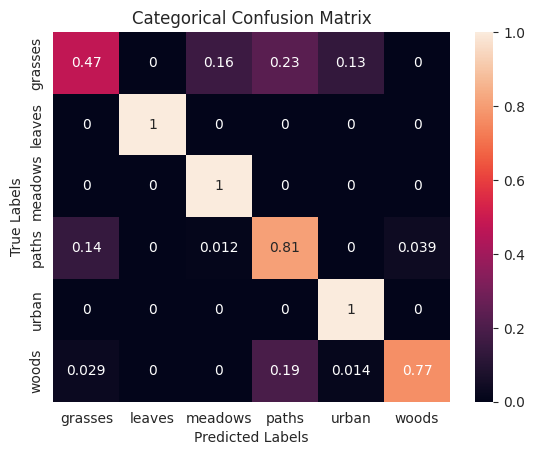

In [ ]:
Cnb_pred = Cnb.predict(X_test_le)

#classification report
print("Classification Report:")
print(classification_report(y_test, Cnb_pred,target_names=class_labels))

#confusion matrix
print("Confusion Matrix:")
Cnb_conf_mat = confusion_matrix(y_test, Cnb_pred, normalize='true')
print(Cnb_conf_mat,'\n')

#heat map
sns.heatmap(Cnb_conf_mat, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Categorical Confusion Matrix')
plt.show()

In [ ]:
print('Gaussian Naive Bayes')
print('Training accuracy: ', Gnb.score(X_val_le, y_val))
print('Validation accuracy: ', Gnb.score(X_test_le, y_test),'\n')

print('Categorical Naive Bayes')
print('Training accuracy: ', Cnb.score(X_val_le, y_val))
print('Validation accuracy: ', Cnb.score(X_test_le, y_test))

accuracy_results.append(['Gaussian Naive Bayes',  Gnb.score(X_val_le, y_val), Gnb.score(X_test_le, y_test)])
accuracy_results.append(['Categorical Naive Bayes',  Cnb.score(X_val_le, y_val), Cnb.score(X_test_le, y_test)])

Gaussian Naive Bayes
Training accuracy:  0.8001336898395722
Validation accuracy:  0.8020728853226345 

Categorical Naive Bayes
Training accuracy:  0.839572192513369
Validation accuracy:  0.8388498829822801


### ROC for Naive Bayes

One-vs-One ROC AUC scores:
0.933514 (macro),
0.932746 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.932428 (macro),
0.931850 (weighted by prevalence)


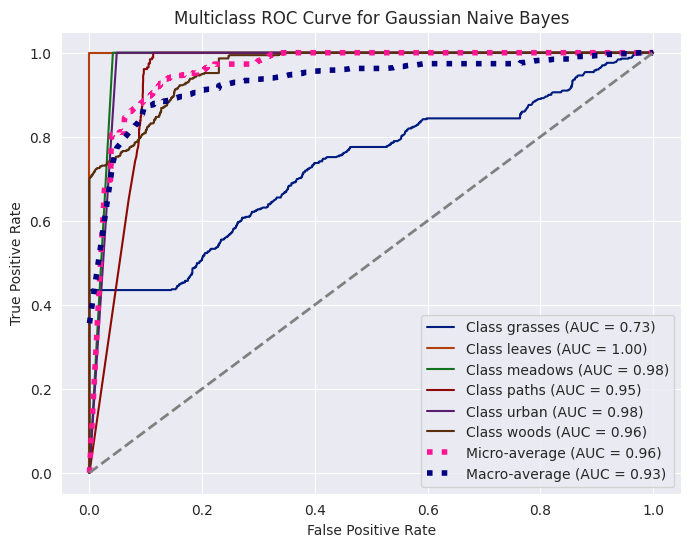

In [ ]:
y_proba = Gnb.predict_proba(X_test_le)

print_ROC_scores(y_test, y_proba)
plot_ROC_curve(y_test, y_proba, 'Gaussian Naive Bayes')

One-vs-One ROC AUC scores:
0.944575 (macro),
0.943963 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.943797 (macro),
0.943226 (weighted by prevalence)


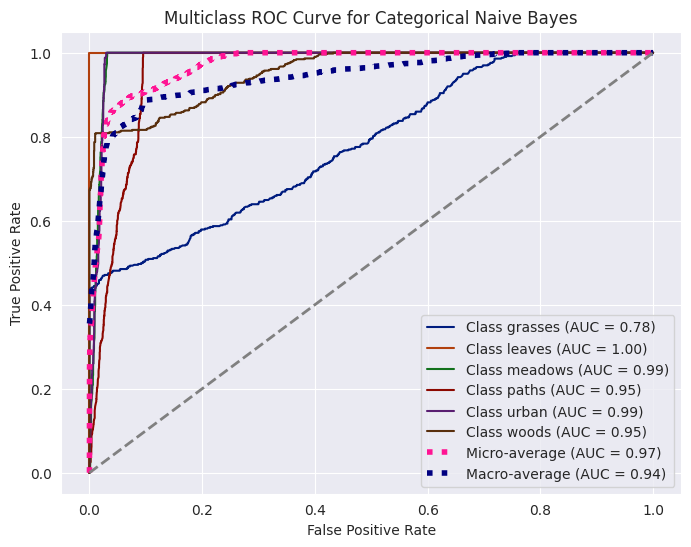

In [ ]:
y_proba = Cnb.predict_proba(X_test_le)

print_ROC_scores(y_test, y_proba)
plot_ROC_curve(y_test, y_proba, 'Categorical Naive Bayes')

## Comparison


In [ ]:
results_table = pd.DataFrame(accuracy_results, columns=['Model', 'Validation Accuracy', 'Testing Accuracy'])
display(results_table)

,Model,Validation Accuracy,Testing Accuracy
0,Logistic Regression,0.880348,0.868606
1,LDA,0.883021,0.867937
2,Random Forest Classification,0.849599,0.838850
3,Gaussian Naive Bayes,0.800134,0.802073
4,Categorical Naive Bayes,0.839572,0.838850
